### EDA part 1:
* #### early insights from studying the meta data and "2024-Federal-AI-Use-Case-Inventory" :

### 🧩 Step 1 – Identify and label columns before the target (`17_impact_type`)

#### Goal
Before deciding what to drop, classify every feature that appears **before** the label into high-level analytic categories. This keeps signal-bearing fields (like text narratives) while safely removing purely administrative/descriptive identifiers.

---

### 1️⃣ Columns before the label (in `case_dat_standardized`)
| YAML Code          | Suggested Category     | Rationale |
|--------------------|------------------------|-----------|
| 2_use_case_name    | **Context / Metadata** | Title/identifier; not a model feature. |
| 3_agency           | **Context / Metadata** | High-level agency name (identifier). |
| 4_bureau           | **Context / Metadata** | Sub-agency/bureau (identifier). |
| 8_topic_area       | **Context / Metadata** | Broad topical class (useful if encoded). |
| 10_commercial_ai   | **Context / Metadata** | Commercial vs. custom; simple categorical. |
| 11_purpose_benefits| **Narrative (Text)**   | Qualitative purpose/benefits; key for NLP. |
| 12_outputs         | **Narrative (Text)**   | Free-text outputs; key for NLP. |
| 16_dev_stage       | **Context / Metadata** | Development stage; categorical. |
| 17_impact_type     | **Target Label**       | Rights-/safety-impacting indicator. |

---

### 2️⃣ Interpretation
- **Keep (likely):**  
  - `11_purpose_benefits`, `12_outputs` — rich textual signal for NLP/classification.  
  - Optionally `8_topic_area`, `16_dev_stage` — lightweight structured predictors.
- **Drop or limit (likely):**  
  - `2_use_case_name`, `3_agency`, `4_bureau` — administrative IDs (risk of leakage, low generalizability).  
  - `10_commercial_ai` — keep only if you expect a substantive link to the label.

---

### 3️⃣ Next Step
Use this categorization to guide cleaning and row filtering:
1. Tag these columns with a `feature_category` (Context, Narrative, Target).
2. **Then** assess row missingness **within the kept features only**.
3. Proceed to Step 2 — quantify how many records lack values **after** `17_impact_type`.


### 🧩 Step 2 – Identify and label columns after the target (`17_impact_type`)

### Goal
Now that the target variable (`17_impact_type`) is defined, we’ll categorize all **subsequent columns** in `case_dat_standardized` to understand which capture policy-relevant signals (e.g., governance, compliance, or operational characteristics) and which might be redundant or sparse.  
This helps us later when we evaluate missingness and decide which records are informative enough to keep.

---

### 1️⃣ Columns after the label

| YAML Code | Suggested Category | Rationale |
|------------|--------------------|------------|
| 18_date_initiated | **Context / Metadata** | When the AI initiative started — temporal marker. |
| 19_date_acq_dev_began | **Context / Metadata** | Start of acquisition/development phase. |
| 20_date_implemented | **Context / Metadata** | Implementation completion date. |
| 21_date_retired | **Context / Metadata** | When the system was retired or decommissioned. |
| 22_dev_method | **Governance / Operational** | Whether the system was built in-house or via contract. |
| 23_contract_piids | **Governance / Operational** | Procurement identifiers; procedural detail. |
| 24_hisp_support | **Context / Metadata** | Whether tied to a High-Impact Service Provider. |
| 25_hisp_name | **Context / Metadata** | Name of the specific HISP service. |
| 26_public_service | **Context / Metadata** | Public-facing service supported. |
| 27_public_info | **Governance / Transparency** | Indicates if information is publicly shared. |
| 28_iqa_compliance | **Governance / Compliance** | Information Quality Act compliance indicator. |
| 29_contains_pii | **Governance / Compliance** | Whether personally identifiable information (PII) is used. |
| 30_saop_review | **Governance / Compliance** | Privacy risk review by Senior Agency Official for Privacy (SAOP). |
| 31_data_catalog | **Governance / Data Management** | Access to data catalog or repository. |
| 33_agency_data | **Governance / Data Management** | Agency-owned training or evaluation data. |
| 34_data_docs | **Governance / Data Management** | Availability of documentation for training/evaluation data. |
| 35_demo_features | **Governance / Fairness** | Whether demographic features are used in the model. |
| 37_custom_code | **Operational / Technical** | Whether custom code is involved. |
| 38_code_access | **Governance / Transparency** | Agency access to model code. |
| 39_code_link | **Governance / Transparency** | Link to public/open-source code (if available). |
| 40_has_ato | **Governance / Compliance** | Whether an Authority to Operate (ATO) exists. |
| 41_system_name | **Context / Metadata** | Internal system identifier. |
| 42_dev_tools_wait | **Operational / Technical** | Wait time for development tools. |
| 43_infra_provisioned | **Operational / Technical** | How IT infrastructure is provisioned. |
| 45_compute_request | **Operational / Technical** | Process for requesting compute resources. |
| 47_timely_resources | **Operational / Governance** | Timeliness of resource provisioning. |
| 49_existing_reuse | **Operational / Efficiency** | Degree of re-use of existing tools/infrastructure. |
| 50_internal_review | **Governance / Oversight** | Whether an internal review occurred. |
| 51_extension_request | **Governance / Oversight** | Request for implementation extension. |
| 52_impact_assessment | **Governance / Oversight** | Whether an AI impact assessment has been completed. |
| 53_real_world_testing | **Governance / Validation** | Real-world or operational testing conducted. |
| 54_key_risks | **Narrative (Text)** | Free-text listing of key risks — rich for NLP. |
| 55_independent_eval | **Governance / Oversight** | Whether independent evaluation occurred. |
| 56_monitor_postdeploy | **Governance / Oversight** | Post-deployment performance monitoring. |
| 57_autonomous_impact | **Governance / Safety** | Potential for autonomous action with human impact. |
| 59_ai_notice | **Governance / Transparency** | Whether users are notified they interact with AI. |
| 61_adverse_impact | **Governance / Fairness** | Whether potential adverse impacts were identified. |
| 62_disparity_mitigation | **Governance / Fairness** | Actions to mitigate demographic disparities. |
| 63_stakeholder_consult | **Governance / Inclusiveness** | Whether affected groups were consulted. |
| 65_appeal_process | **Governance / Accountability** | Process for appeals or contesting decisions. |
| 66_no_appeal_reason | **Governance / Accountability** | Reason for no appeal process (if missing). |
| 67_opt_out | **Governance / Rights** | Whether users can opt out in favor of a human alternative. |

---

### 2️⃣ Interpretation

- **High-value predictors:**  
  - *Governance & Compliance* fields (50–67 range) — oversight, accountability, fairness, and rights protections.  
    These often correlate with the label `17_impact_type` and will likely serve as important predictors.  
  - *Narrative text* (`54_key_risks`) — potential for NLP analysis.  

- **Lower-value / Descriptive fields:**  
  - *Context & Metadata* (18–21, 24–26, 41) — purely descriptive or temporal; may be kept for auditing but dropped from modeling if not predictive.  

- **Sparse or procedural fields:**  
  - *Operational / Technical* (42–49) — may have many NaNs; evaluate completeness before retaining.

---

### 3️⃣ Next Step
1. Quantify **missingness** for each post-impact feature category.  
2. Identify records with **no non-null values** across these columns — candidates for removal before modeling.  
3. Visualize missingness patterns (e.g., bar chart or heatmap) to assess where data density drops off.


 ***

***

In [1]:
# set up page for EDA (impot basic packages required for EDA)
import pandas as pd # for data ops
import numpy as np  # for numeric ops

# visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read data
data = pd.read_csv("case_dat_standardized.yamlcols.csv")

data.head(2)

,2_use_case_name,3_agency,3_abr,4_bureau,8_topic_area,8_question_type,10_commercial_ai,11_purpose_benefits,12_outputs,16_dev_stage,...,59_ai_notice,63_question_type,61_adverse_impact,62_disparity_mitigation,63_stakeholder_consult,67_question_type,65_appeal_process,66_no_appeal_reason,67_opt_out,47_question_type.1
0,Non-Intrusive Inspection (NII) 3D Imaging Tool,Department of Homeland Security,DHS,CBP,Law & Justice,NaN,None of the above.,"Utilizes AI/ML to generate high resolution, ra...",Detection alerts for Items of Interest.,Implementation and Assessment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Babel,Department of Homeland Security,DHS,CBP,Law & Justice,NaN,None of the above.,CBP uses this tool to conduct targeted queries...,Babel utilizes AI modules for Text detection a...,Implementation and Assessment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# data dimentions
data.shape

(2133, 62)

### 🧩 Step 3 – Understanding Missingness

#### Goal
Instead of inspecting missingness one column at a time, we’ll take a **layered approach** that starts with broad data structure insights and narrows down to specific problem areas.

This approach balances interpretability and efficiency in a high-dimensional dataset.

---

#### 1️⃣ Layer 1 — Macro-Level Overview
**Objective:** Get a general sense of completeness across the entire dataset.

**What to do:**
- Use `df.isna().mean()` to compute the **percentage of missing values per column**.
- Visualize with a horizontal barplot for the top N columns with the highest missingness.
- Use `missingno.matrix(df)` for a quick structural view (where missing fields cluster).

**Why:**
Shows which parts of the schema are sparsely populated (e.g., post-implementation governance vs. pre-implementation metadata).

---

#### 2️⃣ Layer 2 — Section-Level Missingness
**Objective:** Assess missingness by logical feature groups rather than by individual column.

**What to do:**
- Group columns by your earlier categories:
  - Context & Metadata  
  - Narrative (Text)  
  - Governance & Compliance  
  - Operational / Technical  
- For each group, calculate the **average proportion of missing values**.
- Visualize using a small grouped bar chart.

**Why:**
Reveals which categories of variables (e.g., governance vs. narrative) are systematically underreported.

---

#### 3️⃣ Layer 3 — Record-Level Completeness
**Objective:** Identify rows (use cases) that are mostly empty.

**What to do:**
- Compute the proportion of non-null cells **per record**:
  ```python
  completeness = case_dat_std.notna().mean(axis=1)


In [4]:
# layer 1, macro level misingness check:
missing_pct = data.isna().mean().sort_values(ascending = False) * 100

# get quick summaries
print(f"data set shape:{data.shape}")                                                  # data set dimension
print(f"average missingness:{missing_pct.mean():.1f}%")                               # avergae missingness
print(f"number of columns with > 50% missing values:{(missing_pct > 50).sum()}")       # number of columns wit 50+ % missing values


data set shape:(2133, 62)
average missingness:62.1%
number of columns with > 50% missing values:40


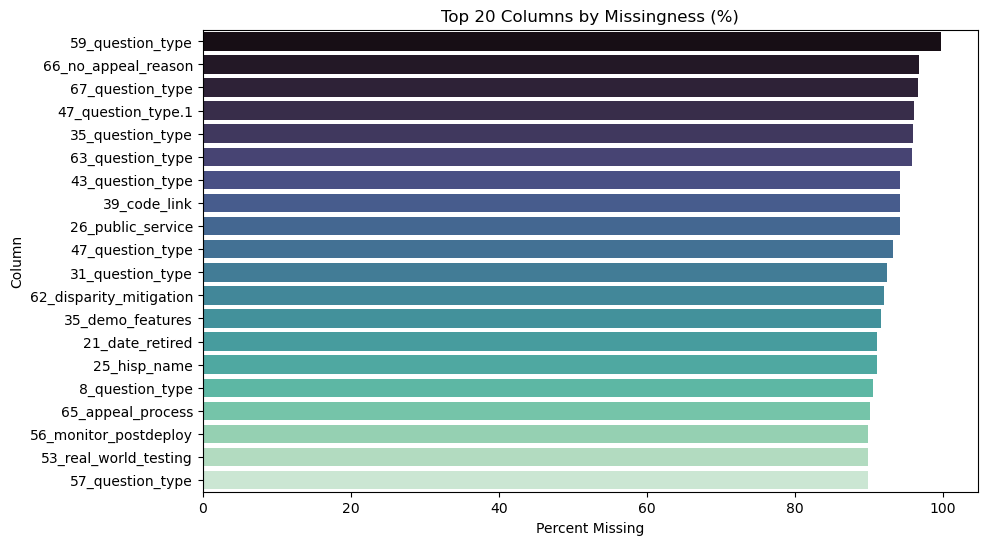

In [5]:
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_pct.head(top_n),
    y=missing_pct.head(top_n).index,
    hue=missing_pct.head(top_n).index,   # use column names as hue
    palette="mako",
    legend=False)
plt.title(f"Top {top_n} Columns by Missingness (%)")
plt.xlabel("Percent Missing")
plt.ylabel("Column")
plt.show()

<Figure size 1200x500 with 0 Axes>

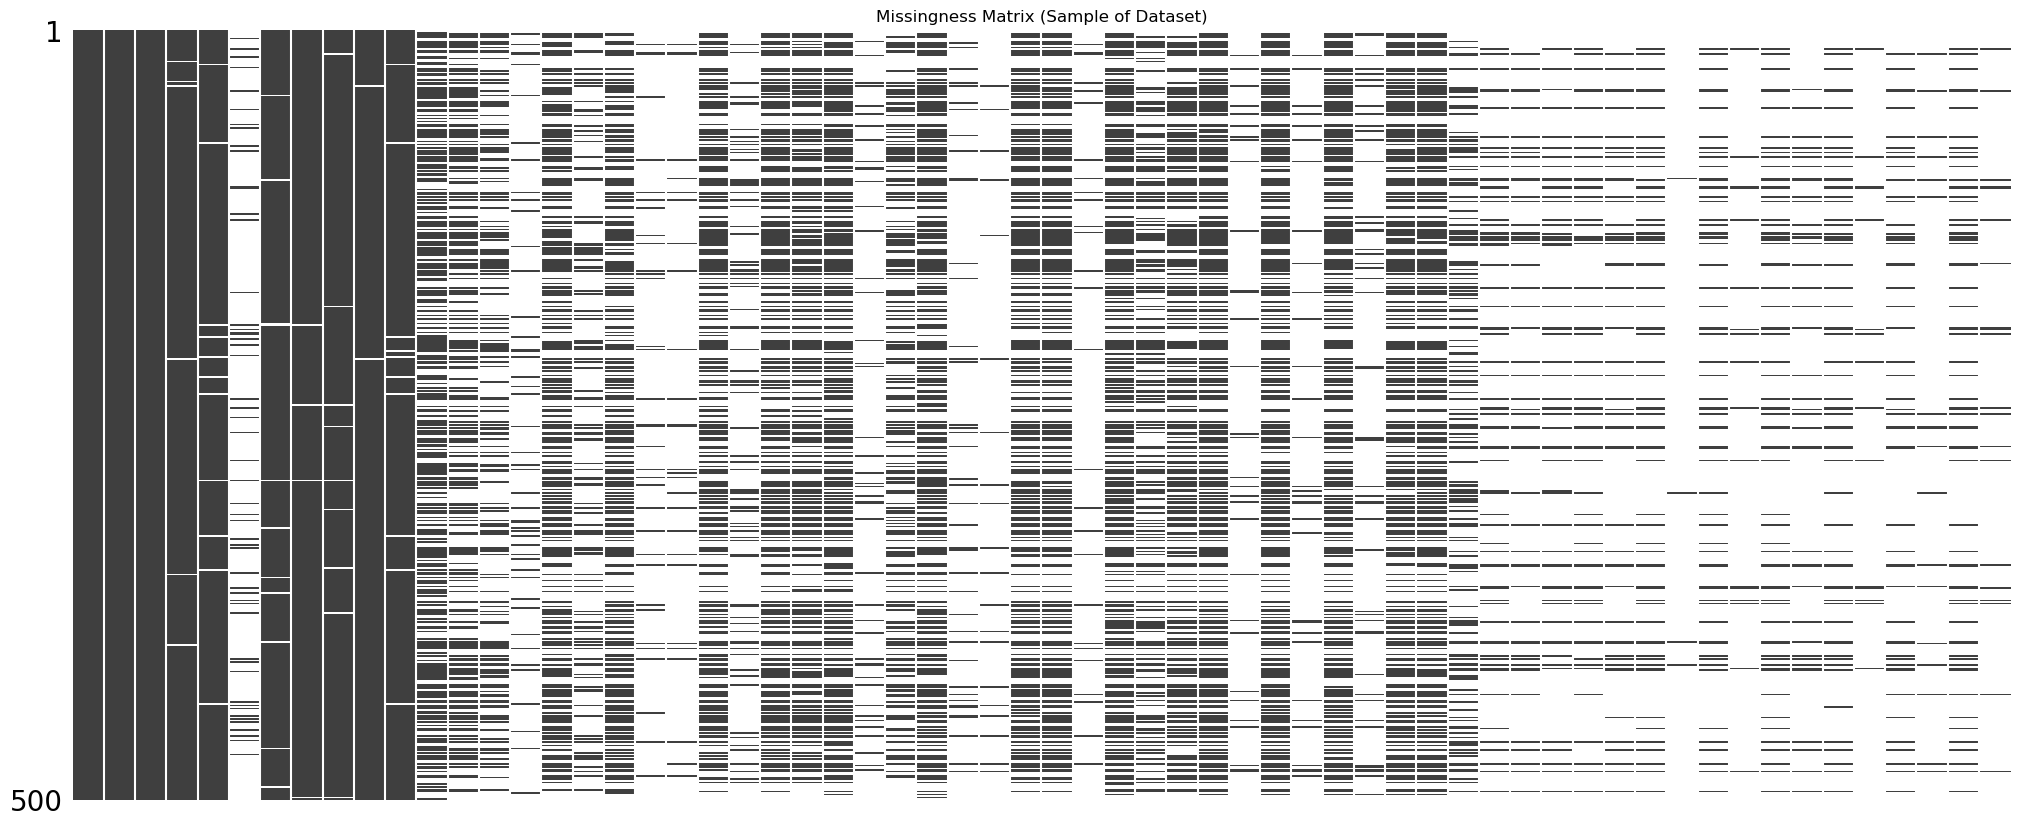

In [6]:
# install and import missingno
!pip install missingno
import missingno as msno

# Structural view of missingness patterns
plt.figure(figsize=(12, 5))
msno.matrix(data.sample(min(500, len(data))), sparkline=False)
plt.title("Missingness Matrix (Sample of Dataset)")
plt.show()

### Interpreting the Missingness Matrix

The plot shows that **most missing values (white areas)** appear **to the right of the `17_impact_type` column**, confirming that post-label fields—mainly **governance, compliance, and operational variables**—are sparsely filled.  

In contrast, the **left side of the plot** (metadata and descriptive fields) is mostly complete, indicating that agencies consistently reported basic information but often left advanced oversight questions blank.  

This pattern supports performing **section-level missingness analysis** next, to quantify completeness by feature category.


---

#### Step 4 – Layer 2: Section-Level Missingness Analysis

#### Goal
Quantify missingness by logical feature groups (Context & Metadata, Narrative Text, Governance & Compliance, Operational / Technical).  
This provides a clearer picture of which sections of the schema are least complete.

In [7]:
# 1) Map columns → feature category (keys must match your actual column names)
feature_categories = {
    # Context & Metadata
    '2_use_case_name':'Context & Metadata','3_agency':'Context & Metadata','4_bureau':'Context & Metadata',
    '8_topic_area':'Context & Metadata','10_commercial_ai':'Context & Metadata','16_dev_stage':'Context & Metadata',
    '18_date_initiated':'Context & Metadata','19_date_acq_dev_began':'Context & Metadata',
    '20_date_implemented':'Context & Metadata','21_date_retired':'Context & Metadata',
    '24_hisp_support':'Context & Metadata','25_hisp_name':'Context & Metadata','26_public_service':'Context & Metadata',
    '41_system_name':'Context & Metadata',

    # Narrative (Text)
    '11_purpose_benefits':'Narrative (Text)','12_outputs':'Narrative (Text)','54_key_risks':'Narrative (Text)',

    # Governance & Compliance
    '22_dev_method':'Governance & Compliance','23_contract_piids':'Governance & Compliance','27_public_info':'Governance & Compliance',
    '28_iqa_compliance':'Governance & Compliance','29_contains_pii':'Governance & Compliance','30_saop_review':'Governance & Compliance',
    '31_data_catalog':'Governance & Compliance','33_agency_data':'Governance & Compliance','34_data_docs':'Governance & Compliance',
    '35_demo_features':'Governance & Compliance','38_code_access':'Governance & Compliance','39_code_link':'Governance & Compliance',
    '40_has_ato':'Governance & Compliance','50_internal_review':'Governance & Compliance','51_extension_request':'Governance & Compliance',
    '52_impact_assessment':'Governance & Compliance','53_real_world_testing':'Governance & Compliance',
    '55_independent_eval':'Governance & Compliance','56_monitor_postdeploy':'Governance & Compliance',
    '57_autonomous_impact':'Governance & Compliance','59_ai_notice':'Governance & Compliance',
    '61_adverse_impact':'Governance & Compliance','62_disparity_mitigation':'Governance & Compliance',
    '63_stakeholder_consult':'Governance & Compliance','65_appeal_process':'Governance & Compliance',
    '66_no_appeal_reason':'Governance & Compliance','67_opt_out':'Governance & Compliance',

    # Operational / Technical
    '37_custom_code':'Operational / Technical','42_dev_tools_wait':'Operational / Technical',
    '43_infra_provisioned':'Operational / Technical','45_compute_request':'Operational / Technical',
    '47_timely_resources':'Operational / Technical','49_existing_reuse':'Operational / Technical'
}

# create a new data frame with two columns; first column includes feature name and secong rate of missing value
missingness = (data.isna().mean()
               .rename("missing_rate")
               .reset_index()
               .rename(columns = {"index":"columns"})
              )

missingness.head(2)

,columns,missing_rate
0,2_use_case_name,0.0
1,3_agency,0.0


In [8]:
# insert the category column and map that to feature categories
missingness["category"] = missingness["columns"].map(feature_categories).fillna("unlabeled")

# aggregate missingness by category
category_missing = missingness.groupby("category", dropna = False)["missing_rate"].mean().sort_values(ascending = False)

category_missing.head()


category
unlabeled                  0.788990
Governance & Compliance    0.731295
Operational / Technical    0.470933
Context & Metadata         0.395285
Narrative (Text)           0.306142
Name: missing_rate, dtype: float64

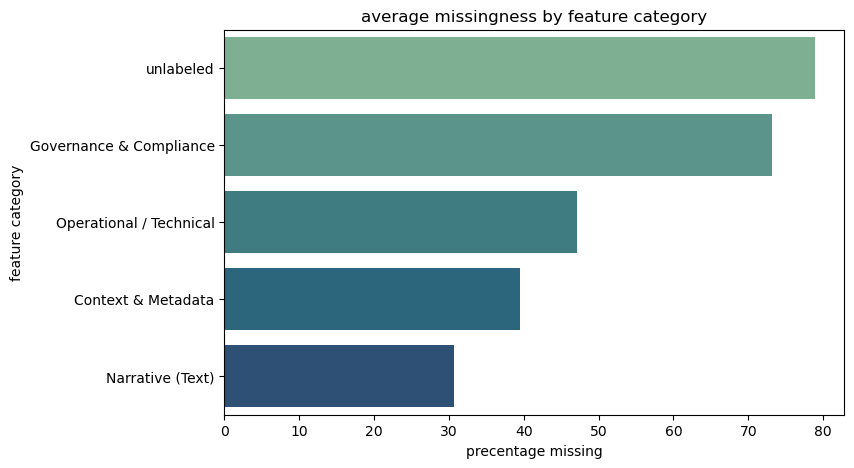

In [9]:
# plot
plt.figure(figsize = (8, 5))
sns.barplot( x = category_missing.values*100, y = category_missing.index, hue = category_missing.index,  palette = "crest")
plt.title("average missingness by feature category")
plt.xlabel("precentage missing")
plt.ylabel("feature category")
plt.show()

In [10]:
set(data.columns) - set(feature_categories.keys())


{'17_impact_type',
 '31_question_type',
 '35_question_type',
 '3_abr',
 '43_question_type',
 '47_question_type',
 '47_question_type.1',
 '57_question_type',
 '59_question_type',
 '63_question_type',
 '67_question_type',
 '8_question_type'}

In [11]:
# cacluate missingness in the target variable
target_na = data["17_impact_type"].isna().sum()

print(f" number of NAs in target var: {target_na}")
print(f"% of NAs in target variable:{(target_na/data.shape[0])*100:.2f}%")

 number of NAs in target var: 39
% of NAs in target variable:1.83%


In [12]:
# sanity check
data["17_impact_type"].value_counts(dropna = False)

17_impact_type
Neither                                                                                                                 1722
Both                                                                                                                     195
Rights-Impacting\n                                                                                                       131
NaN                                                                                                                       39
Safety-impacting                                                                                                          20
No, use case is too new to fully assess impacts; will be reassessed before end of initiation stage.                       12
No, use case is too new to fully assess impacts; will be reassessed before end of acquisition and development stage.       8
Safety-Impacting                                                                                              

In [13]:
# standardize target categories
data['17_impact_type_clean'] = (
    data['17_impact_type']
    .str.strip()   # remove whitespace / newlines
    .replace({
        'Rights-Impacting\n': 'Rights-Impacting',
        'Safety-impacting': 'Safety-Impacting',
        'No, use case is too new to fully assess impacts; will be reassessed before end of initiation stage.': 'Undetermined',
        'No, use case is too new to fully assess impacts; will be reassessed before end of acquisition and development stage.': 'Undetermined',
        'Case-by-case assessment': 'Undetermined'
    })
)

# check cleaned categories
data['17_impact_type_clean'].value_counts(dropna=False)

17_impact_type_clean
Neither             1722
Both                 195
Rights-Impacting     131
NaN                   39
Safety-Impacting      25
Undetermined          21
Name: count, dtype: int64

### 🧩 Step 5 – Layer 3: Record-Level Completeness

Now that column-level missingness is understood, assess **how complete each record (row)** is overall.  
This shows how many use cases are too sparse to keep for analysis or modeling.


In [14]:
# calculate completeness per record
data["row_completeness"] = data.notna().mean(axis = 1)

# get summaries
print(f"average record completeness: {data["row_completeness"].mean():.2%}")
print(f"records with <20% completeness: {(data["row_completeness"] < 0.2).sum()}")

average record completeness: 38.87%
records with <20% completeness: 705


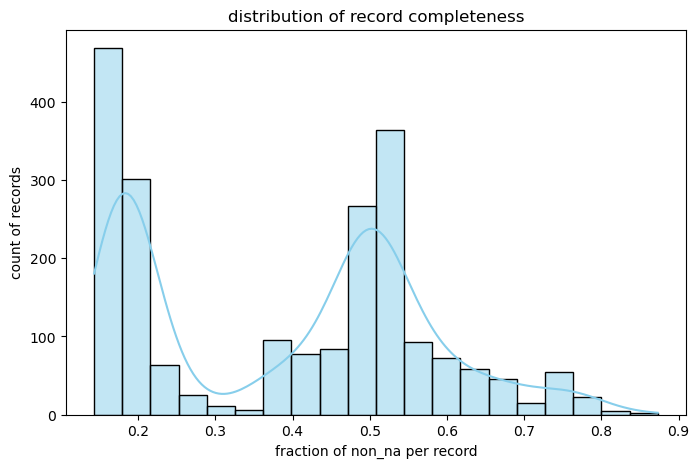

In [15]:
# plot distribution of records over completeness percentages
plt.figure(figsize = (8, 5))
sns.histplot(data["row_completeness"], bins = 20, kde = True, color = "skyblue")
plt.title("distribution of record completeness")
plt.xlabel("fraction of non_na per record")
plt.ylabel("count of records")
plt.show()

### Interpreting Record-Level Completeness

The histogram of record completeness shows a **multi-modal pattern**, meaning records cluster at different levels of completeness rather than forming a single smooth peak.

- **First peak (low completeness ≈ 0.1–0.2):** Many entries contain only minimal metadata such as agency name or use-case title.  
- **Trough around 0.3:** Few records sit in this middle ground—transition between near-empty and moderately complete submissions.  
- **Second peak (≈ 0.5–0.6):** Records that include metadata plus some governance or operational details; these are the main informative cases.  
- **Gradual decline after 0.7:** Fewer records are almost fully filled; only a small subset approaches complete reporting.

**Interpretation:**  
This pattern reflects different reporting behaviors across agencies—some provided only required fields, while others filled in substantial detail.  
A practical threshold such as **0.3 completeness** can be used to flag or drop extremely sparse records before modeling.


**Step 7- Agency Level Aggregation and Scoring**


In this step, we created three simple scores- governance, transparency, and fairness to measure how well each agency manages its AI programs. These scores were made by averaging related Yes/No questions for each category. Then we grouped the data by agency to see overall patterns and differences. This helps identify which agencies report stronger oversight and which ones have gaps in their governance or transparency practices.

Created governance, transparency, and fairness indices safely.
Aggregated agency-level dataset shape: (340, 8)


,3_agency,4_bureau,n_cases,pct_rights_impacting,pct_safety_impacting,mean_governance,mean_transparency,mean_fairness
0,Board of Governors of the Federal Reserve System,Division of Board Members,1,0.0,0.0,NaN,NaN,NaN
1,Board of Governors of the Federal Reserve System,Division of Consumer and Community Affairs,1,0.0,0.0,0.333,0.000,NaN
2,Board of Governors of the Federal Reserve System,Division of Information Technology,6,0.0,0.0,0.611,0.000,NaN
3,Board of Governors of the Federal Reserve System,Division of International Finance,2,0.0,0.0,NaN,NaN,NaN
4,Board of Governors of the Federal Reserve System,Division of Monetary Affairs,2,0.0,0.0,0.333,0.000,NaN
5,Board of Governors of the Federal Reserve System,Division of Research and Statistics,9,0.0,0.0,0.381,0.125,NaN
6,Board of Governors of the Federal Reserve System,Division of Reserve Bank Operations and Paymen...,1,0.0,0.0,NaN,NaN,NaN
7,Board of Governors of the Federal Reserve System,Division of Supervision and Regulation,26,0.0,0.0,0.312,0.062,NaN
8,Board of Governors of the Federal Reserve System,Office of the Inspector General,1,0.0,0.0,NaN,NaN,NaN
9,Board of Governors of the Federal Reserve System,Office of the Secretary,1,0.0,0.0,1.000,0.000,NaN


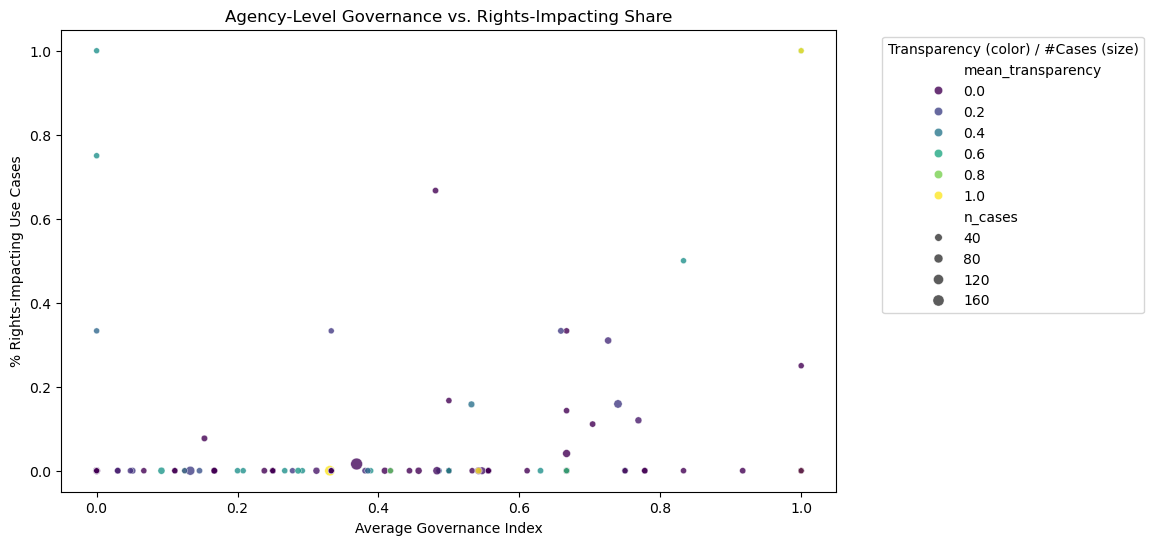

Saved 'agency_level_summary.csv' for external dataset merging.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load data
data = pd.read_csv("case_dat_standardized.yamlcols.csv")

#normalize column names (strip spaces, lowercase, unify dots)
data.columns = data.columns.str.strip().str.replace('.', '_', regex=False)

#define binary mapping for yes/no type fields
binary_map = {"Yes": 1, "No": 0, "Y": 1, "N": 0, "TRUE": 1, "FALSE": 0,
              "True": 1, "False": 0, "Yes ": 1, "No ": 0}

#create indices if not present — safe version with coercion
binary_map = {"Yes": 1, "No": 0, "Y": 1, "N": 0, "TRUE": 1, "FALSE": 0,
              "True": 1, "False": 0, "Yes ": 1, "No ": 0}

def safe_binary_mean(df, cols):
    """
    Safely map Yes/No values to 1/0 and ignore anything else.
    Returns a numeric series with row-wise mean, skipping invalid text.
    """
    subset = df[cols].copy()
    for c in subset.columns:
        subset[c] = subset[c].map(binary_map)   # map known yes/no
        subset[c] = pd.to_numeric(subset[c], errors='coerce')
    return subset.mean(axis=1, skipna=True)

gov_cols = [c for c in data.columns if c.startswith(('28_iqa', '29_contains', '30_saop', '40_has',
                                                     '50_internal', '52_impact', '56_monitor'))]
trans_cols = [c for c in data.columns if c.startswith(('27_public', '38_code', '59_ai', '65_appeal'))]
fair_cols = [c for c in data.columns if c.startswith(('35_demo', '61_adverse', '62_disparity', '63_stakeholder'))]

data['governance_index'] = safe_binary_mean(data, gov_cols)
data['transparency_index'] = safe_binary_mean(data, trans_cols)
data['fairness_index'] = safe_binary_mean(data, fair_cols)

print("Created governance, transparency, and fairness indices safely.")

#clean target label if needed
if '17_impact_type_clean' not in data.columns and '17_impact_type' in data.columns:
    data['17_impact_type_clean'] = (
        data['17_impact_type']
        .astype(str)
        .str.strip()
        .replace({
            'Rights-Impacting\n': 'Rights-Impacting',
            'Safety-impacting': 'Safety-Impacting',
            'Case-by-case assessment': 'Undetermined',
            'No, use case is too new to fully assess impacts; will be reassessed before end of initiation stage.': 'Undetermined',
            'No, use case is too new to fully assess impacts; will be reassessed before end of acquisition and development stage.': 'Undetermined'
        })
    )

#agency level aggregation
agency_cols = [c for c in ['3_agency', '4_bureau'] if c in data.columns]
agency_df = data[agency_cols + [
    'governance_index', 'transparency_index', 'fairness_index', '17_impact_type_clean'
]].copy()

agency_df = agency_df.dropna(subset=[agency_cols[0]])

agency_summary = (
    agency_df
    .groupby(agency_cols, dropna=False)
    .agg(
        n_cases=('17_impact_type_clean', 'count'),
        pct_rights_impacting=('17_impact_type_clean',
                              lambda x: (x == 'Rights-Impacting').mean()),
        pct_safety_impacting=('17_impact_type_clean',
                              lambda x: (x == 'Safety-Impacting').mean()),
        mean_governance=('governance_index', 'mean'),
        mean_transparency=('transparency_index', 'mean'),
        mean_fairness=('fairness_index', 'mean')
    )
    .reset_index()
    .round(3)
)

print(f"Aggregated agency-level dataset shape: {agency_summary.shape}")
display(agency_summary.head(10))

#visualization
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=agency_summary,
    x='mean_governance', y='pct_rights_impacting',
    size='n_cases', hue='mean_transparency', palette='viridis', alpha=0.8
)
plt.title("Agency-Level Governance vs. Rights-Impacting Share")
plt.xlabel("Average Governance Index")
plt.ylabel("% Rights-Impacting Use Cases")
plt.legend(title="Transparency (color) / #Cases (size)", bbox_to_anchor=(1.05,1))
plt.show()

#save for external merges
agency_summary.to_csv("agency_level_summary.csv", index=False)
print("Saved 'agency_level_summary.csv' for external dataset merging.")


**Step 7- Outcome:**

The agency-level analysis shwoed that most federal agencies have few rights impacting AI systems, meaning their current AI projects are generally low-risk. However, governance and transparency scores vary widely; some agencies report strong oversight practices, while others provide little or no information. Transparency was the weakest area overall, showing that few agencies make their AI processes or policies public. These findings highlight inconsistent reporting and oversight maturity across agencies, setting the stage for Step 8, where we explore whether external factors like funding can help explain these differences.



**Step 8- External Data Enrichment (USAspending Integration)**

In this step, we linked our agency-level summary data with external funding information from USAspending.gov. The goal was to see if agency funding levels could help explain differences in governance, transparency, or fairness scores. After merging the datasets, we created a scatter plot and heatmap to explore relationships between funding and oversight maturity. The results showed that funding alone does not explain governance quality, suggesting that other factors like organizational practices or leadership may play a bigger role in how agencies manage AI responsibly.

Merged dataset preview:
                                            3_agency  \
0   Board of Governors of the Federal Reserve System   
1   Board of Governors of the Federal Reserve System   
2   Board of Governors of the Federal Reserve System   
3   Board of Governors of the Federal Reserve System   
4   Board of Governors of the Federal Reserve System   
5   Board of Governors of the Federal Reserve System   
6   Board of Governors of the Federal Reserve System   
7   Board of Governors of the Federal Reserve System   
8   Board of Governors of the Federal Reserve System   
9   Board of Governors of the Federal Reserve System   
10              Commodity Futures Trading Commission   
11              Commodity Futures Trading Commission   
12              Commodity Futures Trading Commission   
13              Commodity Futures Trading Commission   
14              Consumer Financial Protection Bureau   
15                         Department of Agriculture   
16                      

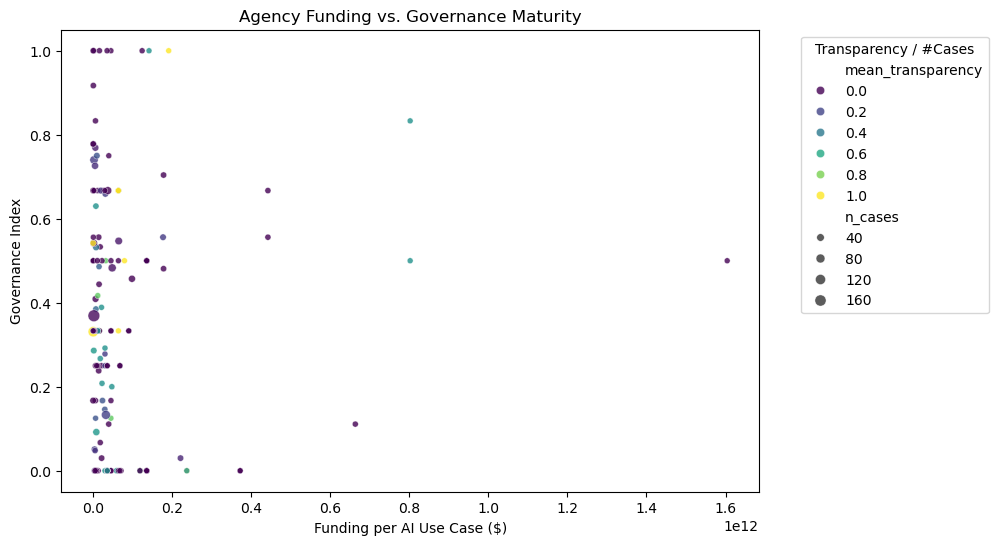

In [17]:
#step 8 - A – Merge with USAspending Data

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

#load agency-level summary (already created in Step 7)
ai = pd.read_csv("agency_level_summary.csv")

#pull latest federal funding totals from USAspending.gov API
url = "https://api.usaspending.gov/api/v2/references/toptier_agencies/"
resp = requests.get(url)
spend = pd.DataFrame(resp.json()['results'])

#keep and rename key columns
spend = spend[['agency_name', 'obligated_amount', 'current_total_budget_authority_amount']]
spend.rename(columns={
    'agency_name': 'Agency',
    'obligated_amount': 'total_obligations',
    'current_total_budget_authority_amount': 'total_budget'
}, inplace=True)

#merge AI data (left join) using agency name
merged = pd.merge(
    ai, spend, how='left',
    left_on='3_agency', right_on='Agency'
)

#compute funding-per-case metric
merged['funding_per_case'] = merged['total_obligations'] / merged['n_cases']

#print merged dataset (first 20 rows for readability)
print("Merged dataset preview:")
print(merged.head(20))

#visualization – funding vs. governance
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=merged,
    x='funding_per_case', y='mean_governance',
    size='n_cases', hue='mean_transparency',
    palette='viridis', alpha=0.8
)
plt.title("Agency Funding vs. Governance Maturity")
plt.xlabel("Funding per AI Use Case ($)")
plt.ylabel("Governance Index")
plt.legend(title="Transparency / #Cases", bbox_to_anchor=(1.05,1))
plt.show()

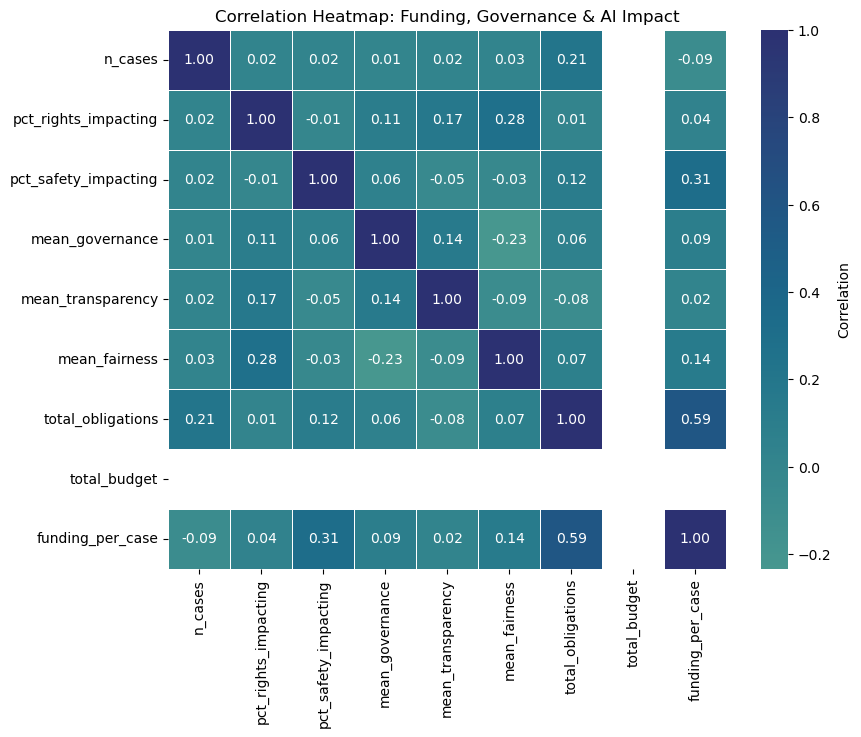

In [18]:
#Step 8 - B – Correlation Heatmap (Funding & Governance)

#select only numeric columns of interest
heat_cols = [
    'n_cases', 'pct_rights_impacting', 'pct_safety_impacting',
    'mean_governance', 'mean_transparency', 'mean_fairness',
    'total_obligations', 'total_budget', 'funding_per_case'
]

#keep only those that exist and are numeric
num_df = merged[heat_cols].apply(pd.to_numeric, errors='coerce')

#compute correlation matrix
corr = num_df.corr()

#plot
plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="crest", center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation Heatmap: Funding, Governance & AI Impact")
plt.show()


**Outcome of Step 8**

After linking the agency-level dataset with USAspending.gov funding data, we explored whether financial resources explain differences in AI governance maturity. The scatter plot showed no clear relationship between agency funding and governance scores, some well-funded agencies still had low transparency and weak oversight practices. The heatmap confirmed this, showing very low correlations between funding, governance, and trnasparency metrics. Overall, this step revealed that funding alone does not determine oversight quality, suggesting that organization culture, policies, and leadership likely play a bigger role in how agencies manage and report AI risks.

### Summary: Why We Kept Agency Features Out of the Model  
### *(For Capstone Report & Presentation)*

### **1. Decision Overview**
We considered incorporating **agency category** and **agency-level governance scores** (transparency, oversight maturity) into the classifier.  
After evaluation, we intentionally **did not integrate** these features into the predictive model.

Instead, we present them as **contextual findings** that complement the main analysis.

---

### **2. Why We Excluded Them from the Model**

#### **A. Avoiding Information Leakage**
Agency governance scores are derived from the same dataset we train on.  
Using them directly as features risks “peeking” into validation/test distributions, reducing methodological integrity.

#### **B. Maintaining Generalizability**
A text-only model generalizes better to:
- new agencies  
- new reporting patterns  
- future inventory cycles  

It avoids overfitting to agency-specific quirks.

#### **C. Preserving Interpretability**
Keeping the model purely text-driven ensures clear, explainable signals:
- narrative content  
- risk keywords  
- intent and purpose descriptions  

This is important for a federal oversight context.

#### **D. Avoiding Late-Stage Pipeline Complexity**
Incorporating agency features would require:
- multilinear feature stacking  
- sparse/numeric matrix integration  
- leakage-safe score computation  
- pipeline re-engineering  

We avoided unnecessary risk this close to delivery.

---

### **3. How We Used Agency Findings Instead**

Even though we did not include agency-level variables in training, we *did* use them for **insight generation**.

#### **Agency-Level Insights Added to the Report**
- Governance maturity varies significantly across agencies.  
- Transparency is the weakest dimension across the federal landscape.  
- Agencies with lower transparency show noisier outcomes in impact reporting.  
- Funding (USAspending data) does **not** explain better or worse governance scores.

These insights strengthen the narrative without modifying the core model.

---

### **4. Final Justification (Client-Ready)**

> *“We explored adding agency identity and governance maturity as predictive features. While these factors show meaningful variation, including them would introduce leakage risk and reduce generalizability. Instead, we preserve a clean, interpretable text-first classifier and present agency-level governance differences as policy insights that contextualize model behavior.”*

---

### **5. How This Fits Into the Presentation**

**Slide: “Agency-Level Insights (Not Used as Model Inputs)”**

- Transparency and governance maturity differ noticeably across agencies.  
- Lower-transparency agencies show more inconsistent impact reporting.  
- To maintain robustness, we kept the classifier text-only.  
- Agency governance insights inform policy recommendations and model context.

---

### **6. Bottom Line**

**No code overhaul. No model risk. Stronger consulting story.**  
Agency insights strengthen the *policy narrative* while keeping the ML pipeline clean and defensible.


### 📘 Building the `context_table` Artifact  
*(Why we are doing it, and how we will use it in the final capstone)*

#### **Why create a context table?**
Our machine-learning classifier is **purely text-based**: it predicts whether an AI use case is *Safety-impacting*, *Rights-impacting*, *Both*, or *Neither* based only on the narrative fields.  
However, during our governance analysis (Steps 7 & 8), we found that:

- **Agencies differ significantly** in their governance, transparency, and fairness maturity.  
- These differences can influence **how completely or accurately** they report risks.  
- Understanding these maturity patterns provides important **policy context** for interpreting model predictions.

By converting governance fields into numeric scores and aggregating them at the agency level, we create a **clean, structured artifact** that summarizes oversight maturity for each agency.

This gives us a second layer of insight that **complements** (but does not interfere with) the ML model.

---

#### **What is in the context table?**
For each agency, the table contains:

- **Governance Score** – strength of oversight mechanisms  
- **Transparency Score** – completeness and clarity of reporting  
- **Fairness/Rights Score** – presence of due-process / appeal safeguards  
- **N (Use Cases)** – number of submissions from that agency  

This is produced by:
1. Converting Yes/No governance fields into 0/1 flags  
2. Computing record-level subscores  
3. Aggregating means by `agency`

---

#### **How will we use this artifact?**

We will **not** feed these scores into the classifier (to avoid leakage and keep the model generalizable).  
Instead, the context table will be used in two ways:

1. **For analysis & reporting**  
   - To highlight differences in governance maturity across agencies  
   - To explain why some agencies may under-report or over-report risks  
   - To support policy recommendations in the final deck and report  

2. **In the Streamlit demo**  
   - User inputs:  
     - Agency name  
     - AI use case narrative  
   - The app will:  
     - Run the classifier to get impact prediction  
     - Look up the agency’s governance/transparency/fairness scores  
     - Send both pieces of information to an LLM  
     - Generate a **contextualized policy explanation** (e.g., “This agency has low transparency, so reviewers may need additional documentation.”)

This creates a richer, **agency-aware triage tool** without modifying the core ML model.

---

#### **Final Step (Artifact Export)**

```python
context_table = agency_summary.copy()
context_table.to_csv("context_table_agency_scores.csv", index=False)
context_table.head()


In [20]:
context_table = agency_summary.copy()
context_table.to_csv("context_table_agency_scores.csv", index=False)
context_table.head()

,3_agency,4_bureau,n_cases,pct_rights_impacting,pct_safety_impacting,mean_governance,mean_transparency,mean_fairness
0,Board of Governors of the Federal Reserve System,Division of Board Members,1,0.0,0.0,NaN,NaN,NaN
1,Board of Governors of the Federal Reserve System,Division of Consumer and Community Affairs,1,0.0,0.0,0.333,0.0,NaN
2,Board of Governors of the Federal Reserve System,Division of Information Technology,6,0.0,0.0,0.611,0.0,NaN
3,Board of Governors of the Federal Reserve System,Division of International Finance,2,0.0,0.0,NaN,NaN,NaN
4,Board of Governors of the Federal Reserve System,Division of Monetary Affairs,2,0.0,0.0,0.333,0.0,NaN
